<a href="https://colab.research.google.com/github/JuanAraque11/Repo-prueba-PPI/blob/main/GuiaAnalisisDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar GeoPandas
!pip install geopandas

In [ ]:
from posixpath import sep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import geopandas as gpd
import warnings

# Ignorar warnings
warnings.filterwarnings('ignore')

ruta = "https://raw.githubusercontent.com/JuanAraque11/ppi_dai_ECHAVARRIAjj/\
main/Un_mundo_en_tu_plato/Datos/restaurantes.csv"

# Cargar el dataset a partir de la ruta establecida
datos = gpd.read_file(ruta, sep=",")


# Verificar la lectura del dataset
datos.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,None
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,None


In [ ]:
# Convertir las columnas de latitud y longitud a tipo numérico
datos['Latitude'] = pd.to_numeric(datos['Latitude'])
datos['Longitude'] = pd.to_numeric(datos['Longitude'])
datos['Price range'] = pd.to_numeric(datos['Price range'])
datos['Aggregate rating'] = pd.to_numeric(datos['Aggregate rating'])
datos['Votes'] = pd.to_numeric(datos['Votes'])
datos['Restaurant Name'] = datos['Restaurant Name'].astype(str)
datos['Address'] = datos['Address'].astype(str)

datos = datos[(datos['Longitude'] != 0) | (datos['Latitude'] != 0)]


def summary(df):
    """ Muestra estadísticas descriptivas de un dataframe.

    Args: df: DataFrame

    Returns: None
    """
    print(f'Forma: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Faltantes#'] = df.isna().sum()
    summ['Faltantes%'] = (df.isna().sum())/len(df)
    summ['Duplicados'] = df.duplicated().sum()
    summ['Unicos'] = df.nunique().values
    summ['Total'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    # summ['Primer valor'] = df.loc[0].values
    # summ['Segundo valor'] = df.loc[1].values
    # summ['Tercer valor'] = df.loc[2].values

    display(summ)

summary(datos)

Forma: (9054, 22)


,Data Type,Faltantes#,Faltantes%,Duplicados,Unicos,Total
Restaurant ID,object,0,0.0,0,9054,9054
Restaurant Name,object,0,0.0,0,7029,9054
Country Code,object,0,0.0,0,15,9054
City,object,0,0.0,0,141,9054
Address,object,0,0.0,0,8468,9054
Locality,object,0,0.0,0,1176,9054
Locality Verbose,object,0,0.0,0,1229,9054
Longitude,float64,0,0.0,0,8120,9054
Latitude,float64,0,0.0,0,8677,9054
Cuisines,object,0,0.0,0,1756,9054


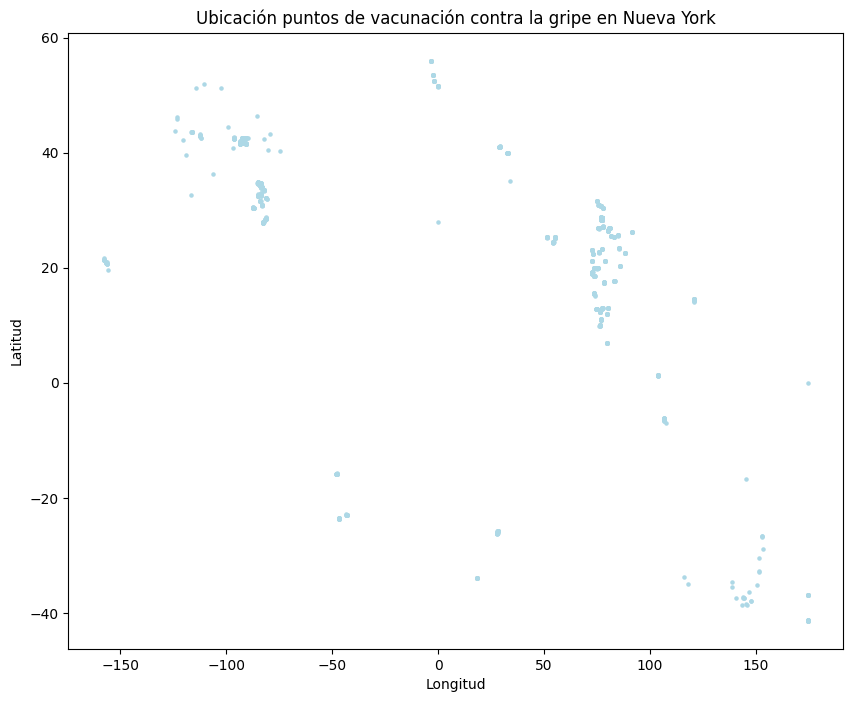

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Trazar los puntos de latitud y longitud
ax.scatter(datos['Longitude'], datos['Latitude'],
           color='lightblue', s=5)

# Configurar el título y etiquetas de los ejes
ax.set_title('Ubicación puntos de vacunación contra la gripe en Nueva York')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

Distribución por paises

City
New Delhi           5240
Gurgaon             1070
Noida                987
Faridabad            229
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


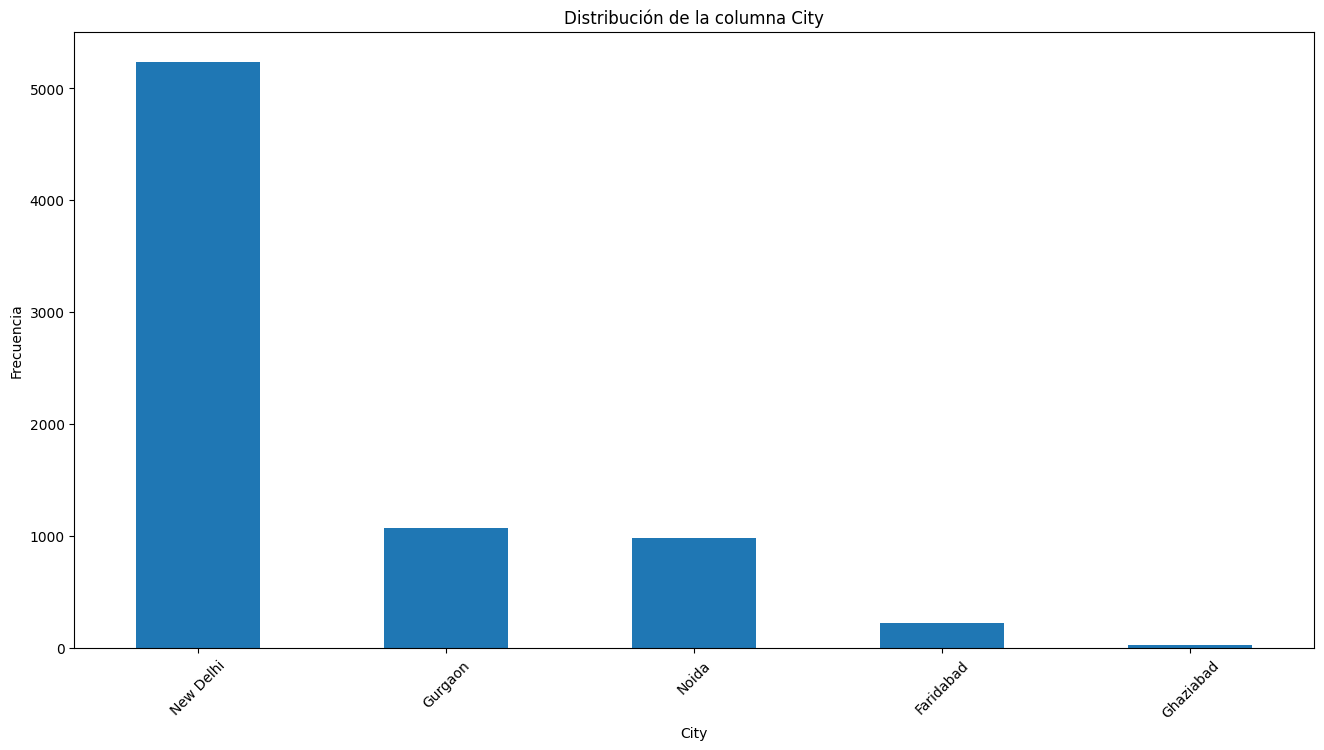

In [ ]:
# Distribución de la columna 'City'
city_distribution = datos['City'].value_counts()

# Mostrar la distribución
print(city_distribution)

# Filtrar las 5 ciudades con más restaurantes
top_cities = city_distribution.head(5)

# Graficar la distribución

plt.figure(figsize=(16, 8))
top_cities.plot(kind='bar')
plt.title('Distribución de la columna City')
plt.xlabel('City')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muchas o muy largas
plt.show()

Hacer el codigo con botones para que el usuario escoja la ciudad (entre las 5 con mas datos) y vea cierta información

In [ ]:
Noida = datos[datos['City'] == 'Noida']
Noida = Noida[Noida['Longitude'] != 0.0]

NewDelhi = datos[datos['City'] == 'New Delhi']
NewDelhi = NewDelhi[NewDelhi['Longitude'] != 34.0]

Gurgaon = datos[datos['City'] == 'Gurgaon']
Faridabad = datos[datos['City'] == 'Faridabad']
Ghaziabad = datos[datos['City'] == 'Ghaziabad']

Funciones de mostrado

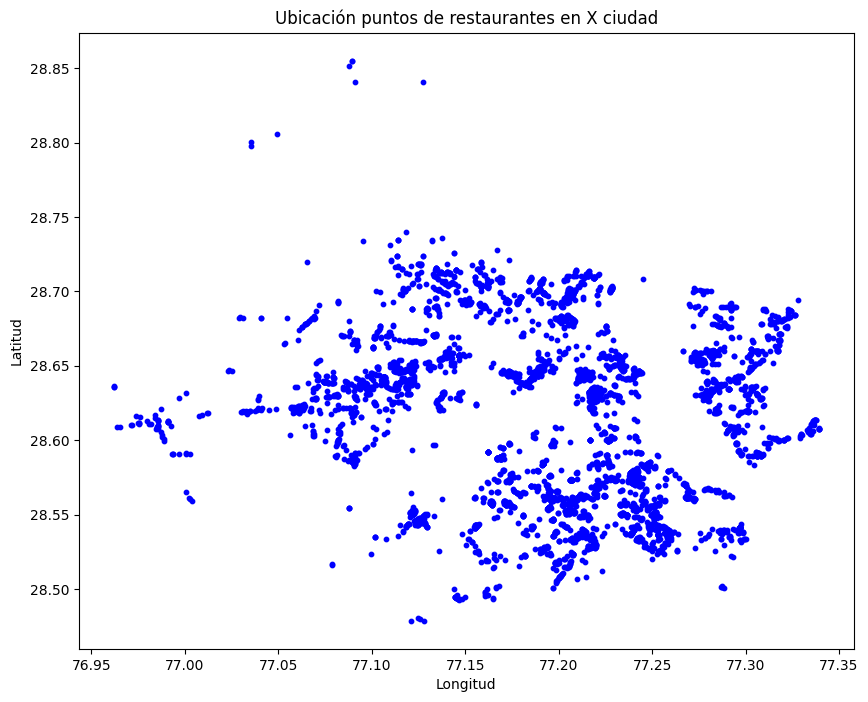

In [ ]:
# Escriba su código aquí

def ubicacionones(df):
    """ Muestra la ubicación de los restaurantes de un dataframe.

    Args: df: DataFrame

    Returns: None
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Trazar los puntos de latitud y longitud
    ax.scatter(df['Longitude'], df['Latitude'],
              color='blue', s=10)

    # Configurar el título y etiquetas de los ejes
    ax.set_title('Ubicación puntos de restaurantes en X ciudad')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el gráfico
    plt.show()

ubicacionones(NewDelhi)

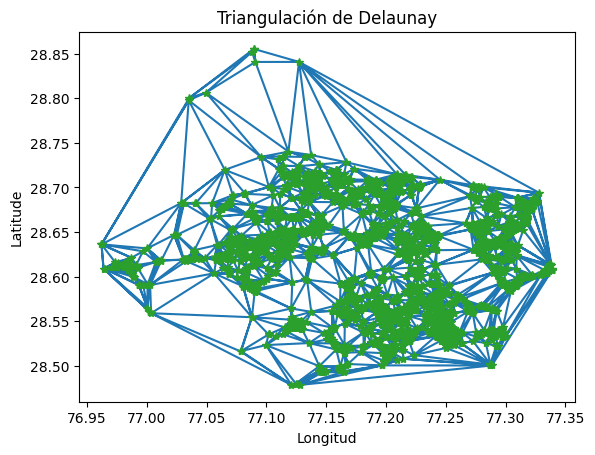

In [ ]:
# Escriba su código aquí
import scipy.spatial as spt

def triangulacion(df):
    """ Muestra la triangulación de Delaunay de un dataframe.

    Args: df: DataFrame

    Returns: None
    """
    points = df[['Longitude', 'Latitude']].to_numpy()

    # Aplicar la triangulación de Delaunay
    triangulation = spt.Delaunay(points)

    # Graficar la triangulación de Delaunay
    plt.triplot(points[:, 0], points[:, 1], triangulation.simplices)

    # Mostrar los vertices
    plt.plot(points[:, 0], points[:,1], '*')

    plt.xlabel('Longitud')
    plt.ylabel('Latitude')
    plt.title('Triangulación de Delaunay')
    plt.show()

triangulacion(NewDelhi)

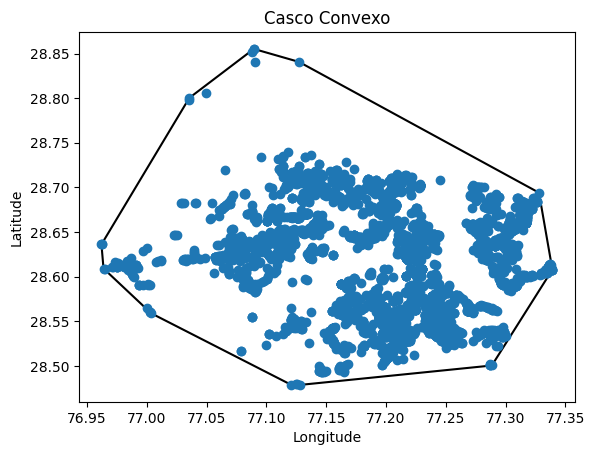

In [ ]:
def casco(df):
    """ Muestra el casco convexo de los puntos de un dataframe.

    Args: df: DataFrame

    Returns: None
    """
    points = df[['Longitude', 'Latitude']].to_numpy()
    # Calcular el casco convexo
    casco = spt.ConvexHull(points)
    puntos_casco = casco.simplices

    # Graficar el casco convexo
    for s in puntos_casco:
        plt.plot(points[s, 0], points[s, 1], 'k-')

    # Graficar los puntos originales
    plt.plot(points[:,0], points[:,1], 'o')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Casco Convexo')
    plt.show()

casco(NewDelhi)

Otras pruebas

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go




In [ ]:
def graficar_mapa(df):
    fig = px.scatter_mapbox(df,
                            lat="Latitude",
                            lon="Longitude",
                            hover_name="Restaurant Name",
                            hover_data={"Address": True},
                            zoom=10,
                            height=600)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(title="Mapa de Restaurantes")

    fig.show()

graficar_mapa(NewDelhi)


In [ ]:
# Librerías de terceros
import streamlit as st
import pandas as pd

# Librerías propias
import funciones
import recetas
import restaurantes
import estadisticas


# Menú de opciones desplegables
opcion = st.sidebar.selectbox("Selecciona una opción:",
                              ["Información", "Guardar Recetas",
                               "Consultar Información de los Platos",
                               "Estadísticas de recetas", "Carga tus recetas",
                               "Elegir recetas", "Distribuciones"])

def main():
    """
    Función principal del programa secundario.

    Args: None

    Returns: None
    """

    # Mostrar contenido según la opción seleccionada
    if opcion == "Información":
        # Título de la página
        st.title("Contenido")
        funciones.mostrar_inicio()
    elif opcion == "Guardar Recetas":
        st.write("En proceso...")
    elif opcion == "Consultar Información de los Platos":
        # Título de la página
        st.title("Calculadora de Ingredientes")

        # Solicitar información al usuario
        plato = st.selectbox("Selecciona un plato:",
                             list(funciones.recetas.keys()))
        num_personas = st.number_input("Número de personas que van a comer:",
                                       min_value=1, value=1)

        # Calcular ingredientes y mostrar resultado
        if st.button("Calcular"):
            cantidad_ingredientes = funciones.calcular_ingredientes(plato,
                                                                    num_personas)
            st.write("Cantidad de Ingredientes Necesarios:")
            for ingrediente, cantidad in cantidad_ingredientes.items():
                st.write(f"- {ingrediente}: {cantidad} gramos")
    elif opcion == "Estadísticas de recetas":
        st.title("Aqui puedes ver las estadísticas de las recetas existentes\
         en la app.")

        estadisticas.distri_categorias()

        estadisticas.distri_valoraciones()

        estadisticas.valoracion_por_dificultad()

        estadisticas.top_recetas_reviews()

        estadisticas.top_recetas_comentadas()


    elif opcion == "Carga tus recetas":

        # Widget para cargar archivo CSV o Excel
        archivo = st.file_uploader("Cargar archivo con tus recetas:", type=["csv", "xlsx"])

        # Si se carga un archivo, leer los datos y mostrarlos
        if archivo is not None:
            # Leer los datos del archivo
            if archivo.type == "application/vnd.openxmlformats-officedocument.spreadsheetml.sheet":  # Excel
                df_datos_adicionales = pd.read_excel(archivo)
            else:  # CSV
                df_datos_adicionales = pd.read_csv(archivo)

            # Mostrar los datos cargados
            st.write("Datos cargados:")
            st.write(df_datos_adicionales)

    elif opcion == "Elegir recetas":
        funciones.elegir_receta()

    elif opcion == "Distribuciones":
        st.write("")
        restaurantes.elegir_restaurantes()


if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
import requests
from bs4 import BeautifulSoup

def obtener_codigo_alfa2(pais):
    url = 'https://es.wikipedia.org/wiki/ISO_3166-1'
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception('Error al solicitar la página')

    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar la tabla que contiene los códigos
    tabla = soup.find('table', {'class': 'wikitable sortable'})

    if not tabla:
        raise Exception('No se encontró la tabla de códigos en la página')

    filas = tabla.find_all('tr')

    for fila in filas[1:]:  # Saltar la cabecera de la tabla
        columnas = fila.find_all('td')
        nombre_pais = columnas[0].get_text(strip=True)
        codigo_alfa2 = columnas[1].get_text(strip=True)

        if nombre_pais.lower() == pais.lower():
            return codigo_alfa2

    return None

if __name__ == '__main__':
    pais = input('Introduce el nombre del país: ')
    codigo = obtener_codigo_alfa2(pais)
    if codigo:
        print(f'El código alfa-2 de {pais} es: {codigo}')
    else:
        print(f'No se encontró el código alfa-2 para {pais}')


Introduce el nombre del país: andorra
No se encontró el código alfa-2 para andorra
